## Preprocessing

In [8]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import os

# Set the random seed for reproducibility
import numpy as np
import random

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [10]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Display the first few rows of the dataframe to confirm the drop
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
# Display the unique values for each column
unique_values

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [14]:
 # Determine the number of unique values in each column.
application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [16]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [18]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 528
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_types_to_replace[application_types_to_replace < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [20]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [22]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_more_than_one = classification_counts[classification_counts > 1]
print(classification_counts_more_than_one)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [24]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 1883 
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [26]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [28]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df)
# Convert Boolean columns to integers (1 and 0)
application_df_dummies = application_df_dummies * 1

# Display the first few rows of the new DataFrame to verify the conversio
application_df_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies['IS_SUCCESSFUL'].values
X = application_df_dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [34]:
# Second attempt
# Define the model - deep neural net
nn = tf.keras.models.Sequential()

# Input layer and first hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=15, activation='relu'))

# Dropout layer for regularization
nn.add(tf.keras.layers.Dropout(0.2))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,431 (25.12 KB)

 Trainable params: 6,431 (25.12 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Check the structure of the model
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,431 (25.12 KB)

 Trainable params: 6,431 (25.12 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.6896 - loss: 0.6036 - val_accuracy: 0.7345 - val_loss: 0.5515
Epoch 2/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.7249 - loss: 0.5633 - val_accuracy: 0.7314 - val_loss: 0.5507
Epoch 3/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7234 - loss: 0.5600 - val_accuracy: 0.7337 - val_loss: 0.5488
Epoch 4/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.7254 - loss: 0.5572 - val_accuracy: 0.7304 - val_loss: 0.5506
Epoch 5/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7264 - loss: 0.5547 - val_accuracy: 0.7308 - val_loss: 0.5488
Epoch 6/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.7259 - loss: 0.5530 - val_accuracy: 0.7326 - val_loss: 0.5485
Epoch 7/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.7264 - loss: 0.5537 - val_accuracy: 0.7308 - val_loss: 0.5475
Epoch 8/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.7293 - loss: 0

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 252us/step - accuracy: 0.7290 - loss: 0.5733
Loss: 0.5732925534248352, Accuracy: 0.7289795875549316


**Second Attempt Analysis**

**Architecture:**

Input Features: 43 (including all numeric and one-hot encoded categorical variables).
Hidden Layers:
Layer 1: 80 neurons with ReLU activation.
Layer 2: 30 neurons with ReLU activation.
Layer 3: 15 neurons with ReLU activation.
Dropout Layer: Regularization with a rate of 0.2 to prevent overfitting.
Output Layer: 1 neuron with sigmoid activation (for binary classification).

**Results:**

Accuracy: 72.90%
Loss: 0.5733

**Key Observations:**

The accuracy improved slightly compared to the initial attempt (72.65%), likely due to the deeper architecture and regularization.
The loss increased slightly to 0.5733, which may indicate increased model complexity and potential overfitting despite the dropout layer.
The model demonstrates better generalization but shows diminishing returns in accuracy improvements.

**Next Steps:**

Experiment with additional optimizations, such as increasing neurons in the hidden layers or adjusting the dropout rate.
Consider tuning hyperparameters, such as the learning rate or batch size, to refine performance further.
Evaluate whether additional hidden layers or advanced regularization methods (e.g., L2 regularization) can improve generalization.

In [43]:
# Export our model to HDF5 file
nn.save("H5/AlphabetSoupCharity_Attempt_2.h5")

print("Model saved successfully!")

Model saved successfully!


In [45]:
# Third Attempt
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Input layer and first hidden layer
nn.add(tf.keras.layers.Dense(units=100, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=15, activation='relu'))

# Dropout layer
nn.add(tf.keras.layers.Dropout(0.1))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,461 (44.77 KB)

 Trainable params: 11,461 (44.77 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Check the structure of the model
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,461 (44.77 KB)

 Trainable params: 11,461 (44.77 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.6972 - loss: 0.5979 - val_accuracy: 0.7298 - val_loss: 0.5512
Epoch 2/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.7221 - loss: 0.5611 - val_accuracy: 0.7304 - val_loss: 0.5483
Epoch 3/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.7266 - loss: 0.5576 - val_accuracy: 0.7300 - val_loss: 0.5478
Epoch 4/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.7274 - loss: 0.5538 - val_accuracy: 0.7310 - val_loss: 0.5470
Epoch 5/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.7268 - loss: 0.5520 - val_accuracy: 0.7298 - val_loss: 0.5474
Epoch 6/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.7274 - loss: 0.5519 - val_accuracy: 0.7306 - val_loss: 0.5483
Epoch 7/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.7265 - loss: 0.5497 - val_accuracy: 0.7310 - val_loss: 0.5471
Epoch 8/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7296 - loss: 0

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 264us/step - accuracy: 0.7261 - loss: 0.5941
Loss: 0.5941178202629089, Accuracy: 0.726064145565033


**Third Attempt Analysis**

**Architecture:**

Input Features: 43 (including all numeric and one-hot encoded categorical variables).
Hidden Layers:
Layer 1: 100 neurons with ReLU activation.
Layer 2: 50 neurons with ReLU activation.
Layer 3: 30 neurons with ReLU activation.
Layer 4: 15 neurons with ReLU activation.
Dropout Layer: Regularization with a rate of 0.1 to mitigate overfitting.
Output Layer: 1 neuron with sigmoid activation (for binary classification).

**Results:**

Accuracy: 72.61%
Loss: 0.5941

**Key Observations:**

The accuracy decreased slightly from the second attempt (72.90% to 72.61%), despite the added complexity of the architecture.
The loss increased to 0.5941, which could indicate that the added layers and neurons introduced overfitting or increased noise in the model.
The dropout rate (0.1) might not have been sufficient to counteract overfitting with this more complex architecture.

**Next Steps:**

Consider adjusting the dropout rate to 0.2 or higher to better manage overfitting in this deeper architecture.
Explore advanced regularization methods, such as L2 regularization, to stabilize training.
Fine-tune hyperparameters like the learning rate or batch size to improve model performance.


In [54]:
# Export our model to HDF5 file
nn.save("H5/AlphabetSoupCharity_Attempt_3.h5")

print("Model saved successfully!")

Model saved successfully!


In [56]:
# Fourth Attempt - Adjusting neurons without adding layers (updated with regularization and tuned learning rate)
from tensorflow.keras.regularizers import l2

# Define the model
nn = tf.keras.models.Sequential()

# Input layer and first hidden layer with L2 regularization
nn.add(tf.keras.layers.Dense(units=120, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))

# Second hidden layer with L2 regularization
nn.add(tf.keras.layers.Dense(units=80, activation='relu', kernel_regularizer=l2(0.01)))

# Third hidden layer with L2 regularization
nn.add(tf.keras.layers.Dense(units=40, activation='relu', kernel_regularizer=l2(0.01)))

# Fourth hidden layer with L2 regularization
nn.add(tf.keras.layers.Dense(units=20, activation='relu', kernel_regularizer=l2(0.01)))

# Dropout layer with a rate of 0.2
nn.add(tf.keras.layers.Dropout(0.2))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 120)            │         5,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,041 (74.38 KB)

 Trainable params: 19,041 (74.38 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Compile the model with a tuned learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Check the structure of the model
nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 120)            │         5,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,041 (74.38 KB)

 Trainable params: 19,041 (74.38 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.7019 - loss: 1.4914 - val_accuracy: 0.7293 - val_loss: 0.6173
Epoch 2/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.7200 - loss: 0.6244 - val_accuracy: 0.7277 - val_loss: 0.6024
Epoch 3/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7189 - loss: 0.6131 - val_accuracy: 0.7324 - val_loss: 0.5963
Epoch 4/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.7206 - loss: 0.6079 - val_accuracy: 0.7347 - val_loss: 0.5925
Epoch 5/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7220 - loss: 0.6055 - val_accuracy: 0.7275 - val_loss: 0.5919
Epoch 6/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.7213 - loss: 0.6026 - val_accuracy: 0.7337 - val_loss: 0.5891
Epoch 7/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7238 - loss: 0.6018 - val_accuracy: 0.7337 - val_loss: 0.5885
Epoch 8/150
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7239 - loss: 0

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 283us/step - accuracy: 0.7208 - loss: 0.5792
Loss: 0.5791938304901123, Accuracy: 0.7208163142204285


**Fourth Attempt Analysis**

**Architecture:**

Input Features: 43 (including all numeric and one-hot encoded categorical variables).
Hidden Layers:
Layer 1: 120 neurons with ReLU activation and L2 regularization.
Layer 2: 80 neurons with ReLU activation and L2 regularization.
Layer 3: 40 neurons with ReLU activation and L2 regularization.
Layer 4: 20 neurons with ReLU activation and L2 regularization.
Dropout Layer: Regularization with a rate of 0.2 to prevent overfitting.
Output Layer: 1 neuron with sigmoid activation (for binary classification).

**Results:**

Accuracy: 72.08%
Loss: 0.5792

**Key Observations:**

The accuracy decreased slightly compared to earlier attempts (72.90% in the second attempt and 72.61% in the third attempt).
The loss remained relatively stable, indicating the model is making consistent predictions.
Adding L2 regularization and increasing the dropout rate did not yield significant improvements, suggesting the architecture may be too complex for the current dataset.

**Next Steps:**

Simplify the architecture by reducing the number of neurons or layers to avoid overfitting and excess noise.
Experiment with a higher dropout rate (e.g., 0.3) to test for improved generalization.
Consider switching to alternative models, such as Random Forests or XGBoost, which may handle the dataset more effectively.

In [64]:
# Export our model to HDF5 file
nn.save("H5/AlphabetSoupCharity_Attempt_4.h5")

print("Model saved successfully!")

Model saved successfully!


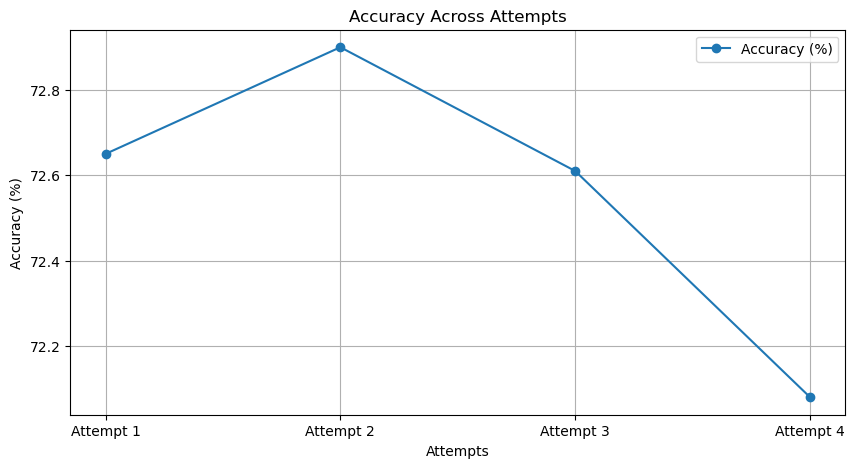

In [2]:
import matplotlib.pyplot as plt
# Results from all attempts
attempts = ["Attempt 1", "Attempt 2", "Attempt 3", "Attempt 4"]
accuracies = [72.65, 72.90, 72.61, 72.08]
losses = [0.5560, 0.5733, 0.5941, 0.5792]

# Cell 1: Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(attempts, accuracies, marker='o', label="Accuracy (%)")
plt.title("Accuracy Across Attempts")
plt.xlabel("Attempts")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.savefig("accuracy_plot.png")
plt.show()


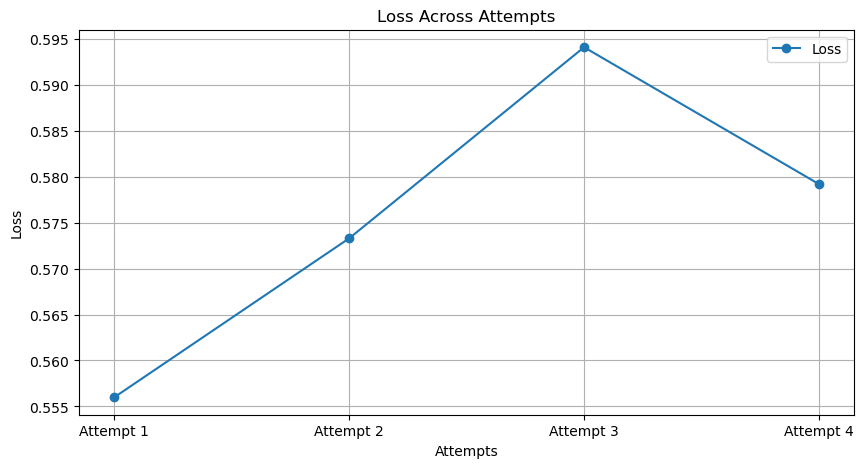

In [4]:
# Cell 2: Plot loss
plt.figure(figsize=(10, 5))
plt.plot(attempts, losses, marker='o', label="Loss")
plt.title("Loss Across Attempts")
plt.xlabel("Attempts")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.savefig("loss_plot.png")
plt.show()
